# Glycolysis Model and Metabolic Control Analysis

In [1]:
%matplotlib inline
from ecell4.prelude import *

/home/kaizu/.local/share/virtualenvs/python-eSbFG-Wg/lib/python3.7/site-packages/xarray/core/merge.py:18: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)
/home/kaizu/.local/share/virtualenvs/python-eSbFG-Wg/lib/python3.7/site-packages/xarray/core/dataarray.py:1829: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  'DataArray', pd.Series, pd.DataFrame, pd.Panel]:


## A Simple Model of the Glycolysis of Human Erythrocytes

This is a model for the glycolysis of human erythrocytes which takes into account ATP-synthesis and -consumption.
This model is based on the model introduced in the following publications:

In [2]:
citation(125616)

Heinrich R, Rapoport TA, Mathematical analysis of multienzyme systems. II. Steady state and transient control. *Bio Systems*, **1**(7), 130-6, 1975. [10.1016/0303-2647(75)90050-7](https://doi.org/10.1016/0303-2647(75)90050-7). PubMed PMID: [125616](https://www.ncbi.nlm.nih.gov/pubmed/125616).

In [3]:
citation(168932)

Rapoport TA, Heinrich R, Mathematical analysis of multienzyme systems. I. Modelling of the glycolysis of human erythrocytes. *Bio Systems*, **1**(7), 120-9, 1975. [10.1016/0303-2647(75)90049-0](https://doi.org/10.1016/0303-2647(75)90049-0). PubMed PMID: [168932](https://www.ncbi.nlm.nih.gov/pubmed/168932).

The model consists of seven reactions and is at the steady state.

In [4]:
with reaction_rules():
    2 * ATP > 2 * A13P2G + 2 * ADP | (3.2 * ATP / (1.0 + (ATP / 1.0) ** 4.0)) | {'name': 'HK_PFK'}
    A13P2G > A23P2G | 1500 | {'name': 'P2GM'}
    A23P2G > PEP | 0.15 | {'name': 'P2Gase'}
    A13P2G + ADP > PEP + ATP | 1.57e+4 | {'name': 'PGK'}
    PEP + ADP > ATP | 559 | {'name': 'PK'}
    AMP + ATP > 2 * ADP | 1.0 * AMP * ATP | {'name': 'AK_f'}
    2 * ADP > AMP + ATP | 2.0 * ADP * ADP | {'name': 'AK_r'}
    ATP > ADP | 1.46 | {'name': 'ATPase'}

m = get_model()

In [5]:
show(m)


2 * ATP > 2 * A13P2G + 2 * ADP | ((3.2 * ATP) / (1.0 + pow((ATP / 1.0), 4.0))) | {'name': 'HK_PFK'}
A13P2G > A23P2G | 1500.0 | {'name': 'P2GM'}
A23P2G > PEP | 0.15 | {'name': 'P2Gase'}
A13P2G + ADP > PEP + ATP | 15700.0 | {'name': 'PGK'}
PEP + ADP > ATP | 559.0 | {'name': 'PK'}
AMP + ATP > 2 * ADP | (1.0 * AMP * ATP) | {'name': 'AK_f'}
2 * ADP > AMP + ATP | (2.0 * ADP * ADP) | {'name': 'AK_r'}
ATP > ADP | 1.46 | {'name': 'ATPase'}


In [6]:
y0 = {"A13P2G": 0.0005082, "A23P2G": 5.0834, "PEP": 0.020502,
      "AMP": 0.080139, "ADP": 0.2190, "ATP": 1.196867}

In [7]:
ret = run_simulation(100, model=m, y0=y0)

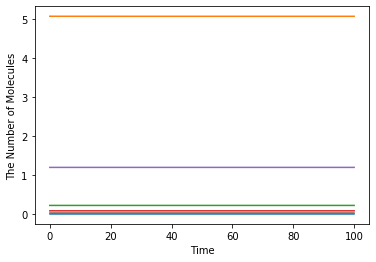

In [8]:
ret

## Metabolic Control Analysis

In [9]:
import numpy

In [10]:
w = ret.world
sim = ode.Simulator(w, m)

First of all, `get_stoichiometry` gives a stoichiometry matrix from the given species and reactions as follows:

In [11]:
numpy.array(get_stoichiometry(m.list_species(), m.reaction_rules()))

array([[ 2., -1.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0., -1., -1.,  2., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
       [-2.,  0.,  0.,  1.,  1., -1.,  1., -1.],
       [ 0.,  0.,  1.,  1., -1.,  0.,  0.,  0.]])

The `evaluate` method of `ode.ODEWorld` returns current fluxes of the given reactions.

In [12]:
numpy.array(w.evaluate(m.reaction_rules()))

array([1.25489042, 0.76235178, 0.76235178, 1.74742906, 2.50978084,
       0.0959183 , 0.0959183 , 1.74742906])

`ode.ODESimulator` has methods for the fundamental properties related to metabolic control analysis.

In [13]:
x = numpy.array(sim.values())
x

array([5.08234520e-04, 5.08234520e+00, 2.05016233e-02, 8.01410043e-02,
       2.18995778e-01, 1.19686922e+00])

In [14]:
dxdt = numpy.array(sim.derivatives())
dxdt

array([ 0.00000000e+00, -7.32716110e-11, -1.27009514e-13,  1.07631959e-12,
        1.09356968e-12, -2.16981988e-12])

In [15]:
J = numpy.array(sim.jacobian())
J

array([[-4.93823371e+03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -7.97928197e+00, -3.54260035e+00],
       [ 1.50000000e+03, -1.50000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.43823371e+03,  1.50000000e-01, -1.22418640e+02,
         0.00000000e+00, -3.48112548e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.19686922e+00,  8.75985548e-01, -8.01410043e-02],
       [-3.43823371e+03,  0.00000000e+00, -1.22418640e+02,
         2.39373844e+00, -2.11916605e+01, -1.92231834e+00],
       [ 3.43823371e+03,  0.00000000e+00,  1.22418640e+02,
        -1.19686922e+00,  2.03156750e+01,  2.00245935e+00]])

In [16]:
E = numpy.array(sim.elasticity())
E

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.77130018e+00],
       [ 1.50000000e+03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.50000000e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.43823371e+03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  7.97928197e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.22418640e+02,
         0.00000000e+00,  1.14604074e+01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.19686922e+00,  0.00000000e+00,  8.01410043e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.75985548e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.46000000e+00]])

`ode.ODESimulator` also provides a stoichiometry matrix and fluxes.

In [17]:
S = numpy.array(sim.stoichiometry())
S

array([[ 2., -1.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
       [ 2.,  0.,  0., -1., -1.,  2., -2.,  1.],
       [-2.,  0.,  0.,  1.,  1., -1.,  1., -1.]])

In [18]:
v = numpy.array(sim.fluxes())
v

array([1.25489042, 0.76235178, 0.76235178, 1.74742906, 2.50978084,
       0.0959183 , 0.0959183 , 1.74742906])

These properties satisfy some relations at the steady state.

$\frac{\mathrm{d}}{\mathrm{d}t}\mathbf{x} = \mathbf{S} \mathbf{v}$

In [19]:
numpy.isclose(dxdt, S @ v)

array([ True,  True,  True,  True,  True,  True])

$\mathbf{J} = \frac{\mathrm{d}^2}{\mathrm{d}t^2}\mathbf{x} = \mathbf{S}\left(\frac{\mathrm{d}}{\mathrm{d}t}\mathbf{v}\right) = \mathbf{S} \mathbf{E}$

In [20]:
numpy.isclose(J, S @ E)

array([[ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

Next, the `ecell4.mca` submodule provides useful functions for metabolic network and control analyses.

In [21]:
from ecell4.mca import *

`generate_full_rank_matrix` gives square matrix to be full rank. In this model, 5 out of 8 reactions are independent.

In [22]:
(link_matrix, kernel_matrix, independent_list) = generate_full_rank_matrix(S)
print(link_matrix)
print(kernel_matrix)
print(independent_list)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0. -1. -1.]]
[[-0.  -0.   0.5]
 [-0.  -1.   1. ]
 [-0.  -1.   1. ]
 [-0.   1.   0. ]
 [ 0.   0.   1. ]
 [ 1.   0.   0. ]
 [ 1.   0.   0. ]
 [ 0.   1.   0. ]]
[0 1 2 3 4]


In [23]:
reduced_matrix = numpy.take(S, independent_list, 0)
reduced_matrix

array([[ 2., -1.,  0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  1.,  0.],
       [ 2.,  0.,  0., -1., -1.,  2., -2.,  1.]])

The original stoichiometry matrix can be reproduced from these reduced matrices:

In [24]:
S == link_matrix @ reduced_matrix

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

In [25]:
0 == S @ kernel_matrix

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

Finally, `ecell4.mca` provides two functions, `unscaled_control_coefficients` and `scaled_control_coefficients`, which calculate concentration and flux control coefficients from stoichiometry and elasticity matrices.

In [26]:
ccc, fcc = unscaled_control_coefficients(S, E)
print(ccc)
print(fcc)

[[ 4.45754267e-04 -2.22877134e-04  0.00000000e+00 -1.93612289e-04
   0.00000000e+00 -7.45294400e-04  7.45294400e-04 -2.92648441e-05]
 [ 4.45754267e+00  4.43789533e+00 -6.66666667e+00 -1.93612289e+00
   0.00000000e+00 -7.45294400e+00  7.45294400e+00 -2.92648441e-01]
 [ 2.20583561e-02 -2.86048736e-03  0.00000000e+00  1.24794630e-03
  -8.16869067e-03 -4.03592231e-02  4.03592231e-02 -4.10843366e-03]
 [-1.22757774e-01  6.13788871e-02  0.00000000e+00 -2.67777988e-02
   0.00000000e+00 -5.85505375e-01  5.85505375e-01  8.81566859e-02]
 [-1.43377537e-01  7.16887683e-02  0.00000000e+00 -3.12756961e-02
   0.00000000e+00  3.62033276e-01 -3.62033276e-01  1.02964464e-01]
 [ 2.66135311e-01 -1.33067655e-01  0.00000000e+00  5.80534949e-02
   0.00000000e+00  2.23472099e-01 -2.23472099e-01 -1.91121150e-01]]
[[ 5.28594477e-01  2.35702761e-01  0.00000000e+00 -1.02830166e-01
   0.00000000e+00 -3.95836168e-01  3.95836168e-01  3.38532927e-01]
 [ 6.68631401e-01  6.65684300e-01  0.00000000e+00 -2.90418434e-01
  

Unscaled control coefficients satisfies connectivity theorem:

In [27]:
numpy.isclose(fcc @ (E @ link_matrix), 0)

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

and

In [28]:
numpy.isclose(numpy.take(ccc, independent_list, 0) @ (E @ link_matrix), -numpy.identity(link_matrix.shape[1]))

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

On the other hand, scaled control coefficients

In [29]:
ccc, fcc = scaled_control_coefficients(S, E, v, x)
print(ccc)
print(fcc)

[[ 1.10061937 -0.3343157   0.         -0.6656843   0.         -0.14065824
   0.14065824 -0.10061937]
 [ 1.10061937  0.6656843  -1.         -0.6656843   0.         -0.14065824
   0.14065824 -0.10061937]
 [ 1.35017697 -0.10636707  0.          0.10636707 -1.         -0.18882349
   0.18882349 -0.35017697]
 [-1.92220644  0.58387469  0.         -0.58387469  0.         -0.70077336
   0.70077336  1.92220644]
 [-0.82158249  0.2495576   0.         -0.2495576   0.          0.15856752
  -0.15856752  0.82158249]
 [ 0.27903688 -0.0847581   0.          0.0847581   0.          0.01790928
  -0.01790928 -0.27903688]]
[[ 5.28594477e-01  1.43190526e-01  0.00000000e+00 -1.43190526e-01
   0.00000000e+00 -3.02559747e-02  3.02559747e-02  4.71405523e-01]
 [ 1.10061937e+00  6.65684300e-01  0.00000000e+00 -6.65684300e-01
   0.00000000e+00 -1.40658239e-01  1.40658239e-01 -1.00619373e-01]
 [ 1.10061937e+00  6.65684300e-01  1.11022302e-16 -6.65684300e-01
   0.00000000e+00 -1.40658239e-01  1.40658239e-01 -1.00619373

satisfies summation theorem:

In [30]:
numpy.isclose(ccc.sum(axis=1), 0)

array([ True,  True,  True,  True,  True,  True])

and

In [31]:
numpy.isclose(fcc.sum(axis=1), 1)

array([ True,  True,  True,  True,  True,  True,  True,  True])

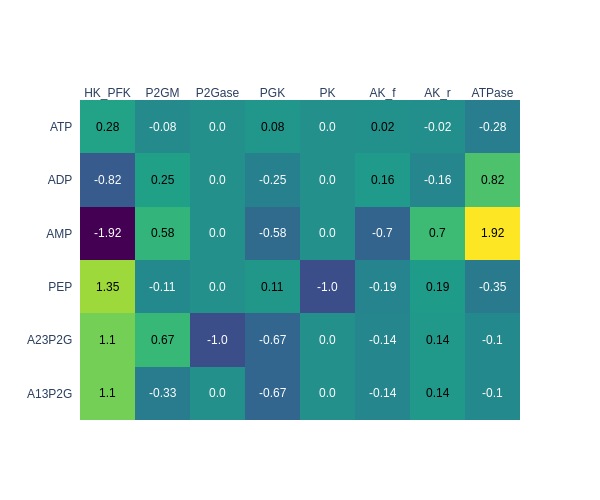

In [32]:
z = ccc
x = [rr.get_attribute('name') for rr in m.reaction_rules()]
y = [sp.serial() for sp in w.list_species()]
z_text = numpy.around(z, decimals=2)

import plotly.figure_factory
fig = plotly.figure_factory.create_annotated_heatmap(
    z, x=x, y=y, annotation_text=z_text, hoverinfo='z', colorscale='Viridis')

# fig.show()
fig.show(renderer="png", width=600, height=500, scale=1)